In [2]:
# TASK: Import the following libraries that we will use: nibabel, matplotlib, numpy
import glob
import os
from os.path import join
from os import listdir
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt
%matplotlib inline

It will help your understanding of the data a lot if you were able to use a tool that allows you to view NIFTI volumes, like [3D Slicer](https://www.slicer.org/). I will refer to Slicer throughout this Notebook and will be pasting some images showing what your output might look like.

## Loading NIFTI images using NiBabel

In [3]:
path_img='C:\\Users\\12035_\\OneDrive\\Desktop\\UNH Studies\\Fall 2020\\03_DL\\Final Project\\project_folder\\src\\images'
path_label='C:\\Users\\12035_\\OneDrive\\Desktop\\UNH Studies\\Fall 2020\\03_DL\\Final Project\\project_folder\\src\\labels'

In [4]:
images = sorted(glob.glob("C:\\Users\\12035_\\OneDrive\\Desktop\\UNH Studies\\Fall 2020\\03_DL\\Final Project\\project_folder\\src\\images\\*.nii.gz"))
labels = sorted(glob.glob("C:\\Users\\12035_\\OneDrive\\Desktop\\UNH Studies\\Fall 2020\\03_DL\\Final Project\\project_folder\\src\\labels\\*.nii.gz"))

In [5]:
img_files=os.listdir(path_img)
label_files=os.listdir(path_label)
len(images), len(labels)

(260, 260)

In [6]:
for img in img_files:
    img_name = img.split(os.sep)[-1]
    if not os.path.exists(os.path.join(path_label, img_name)):
        image_no_label.append(img_name)
        print(img_name) 
        img_files.remove(img_name)

In [7]:
len(img_files), len(label_files)

(260, 260)

In [8]:
image=nib.load(os.path.join(path_img,os.listdir(path_img)[3]))
label=nib.load(os.path.join(path_label,os.listdir(path_img)[3]))

In [9]:
print(image.get_fdata().shape, label.get_fdata().shape)

(35, 52, 34) (35, 52, 34)


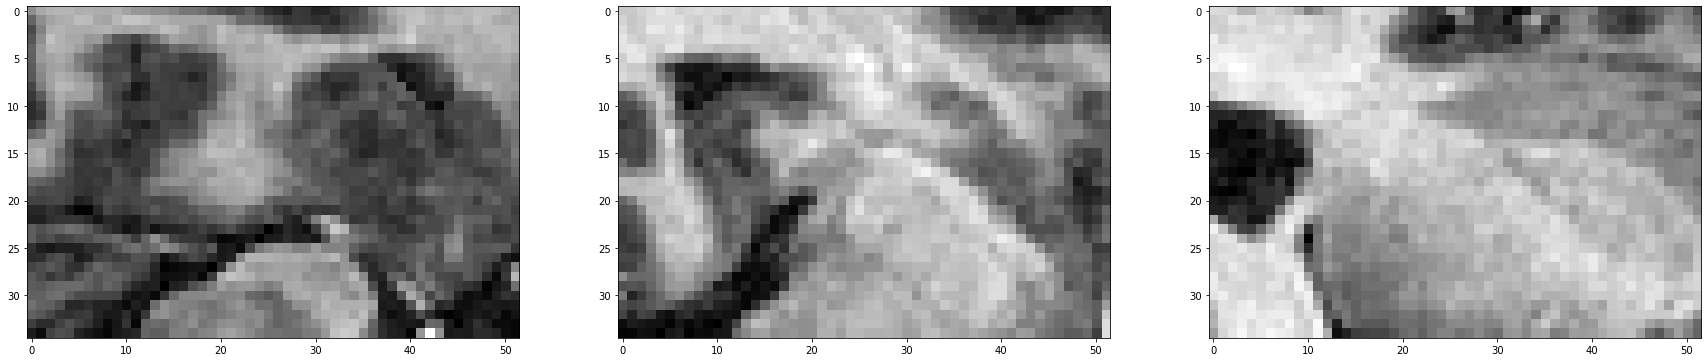

In [10]:
plt.rcParams["figure.figsize"] = (30,30)
plt.subplot(131)
plt.imshow(image.get_fdata()[:,:,10],cmap='gray')
plt.subplot(132)
plt.imshow(image.get_fdata()[:,:,20],cmap='gray')
plt.subplot(133)
plt.imshow(image.get_fdata()[:,:,30],cmap='gray')
plt.show()

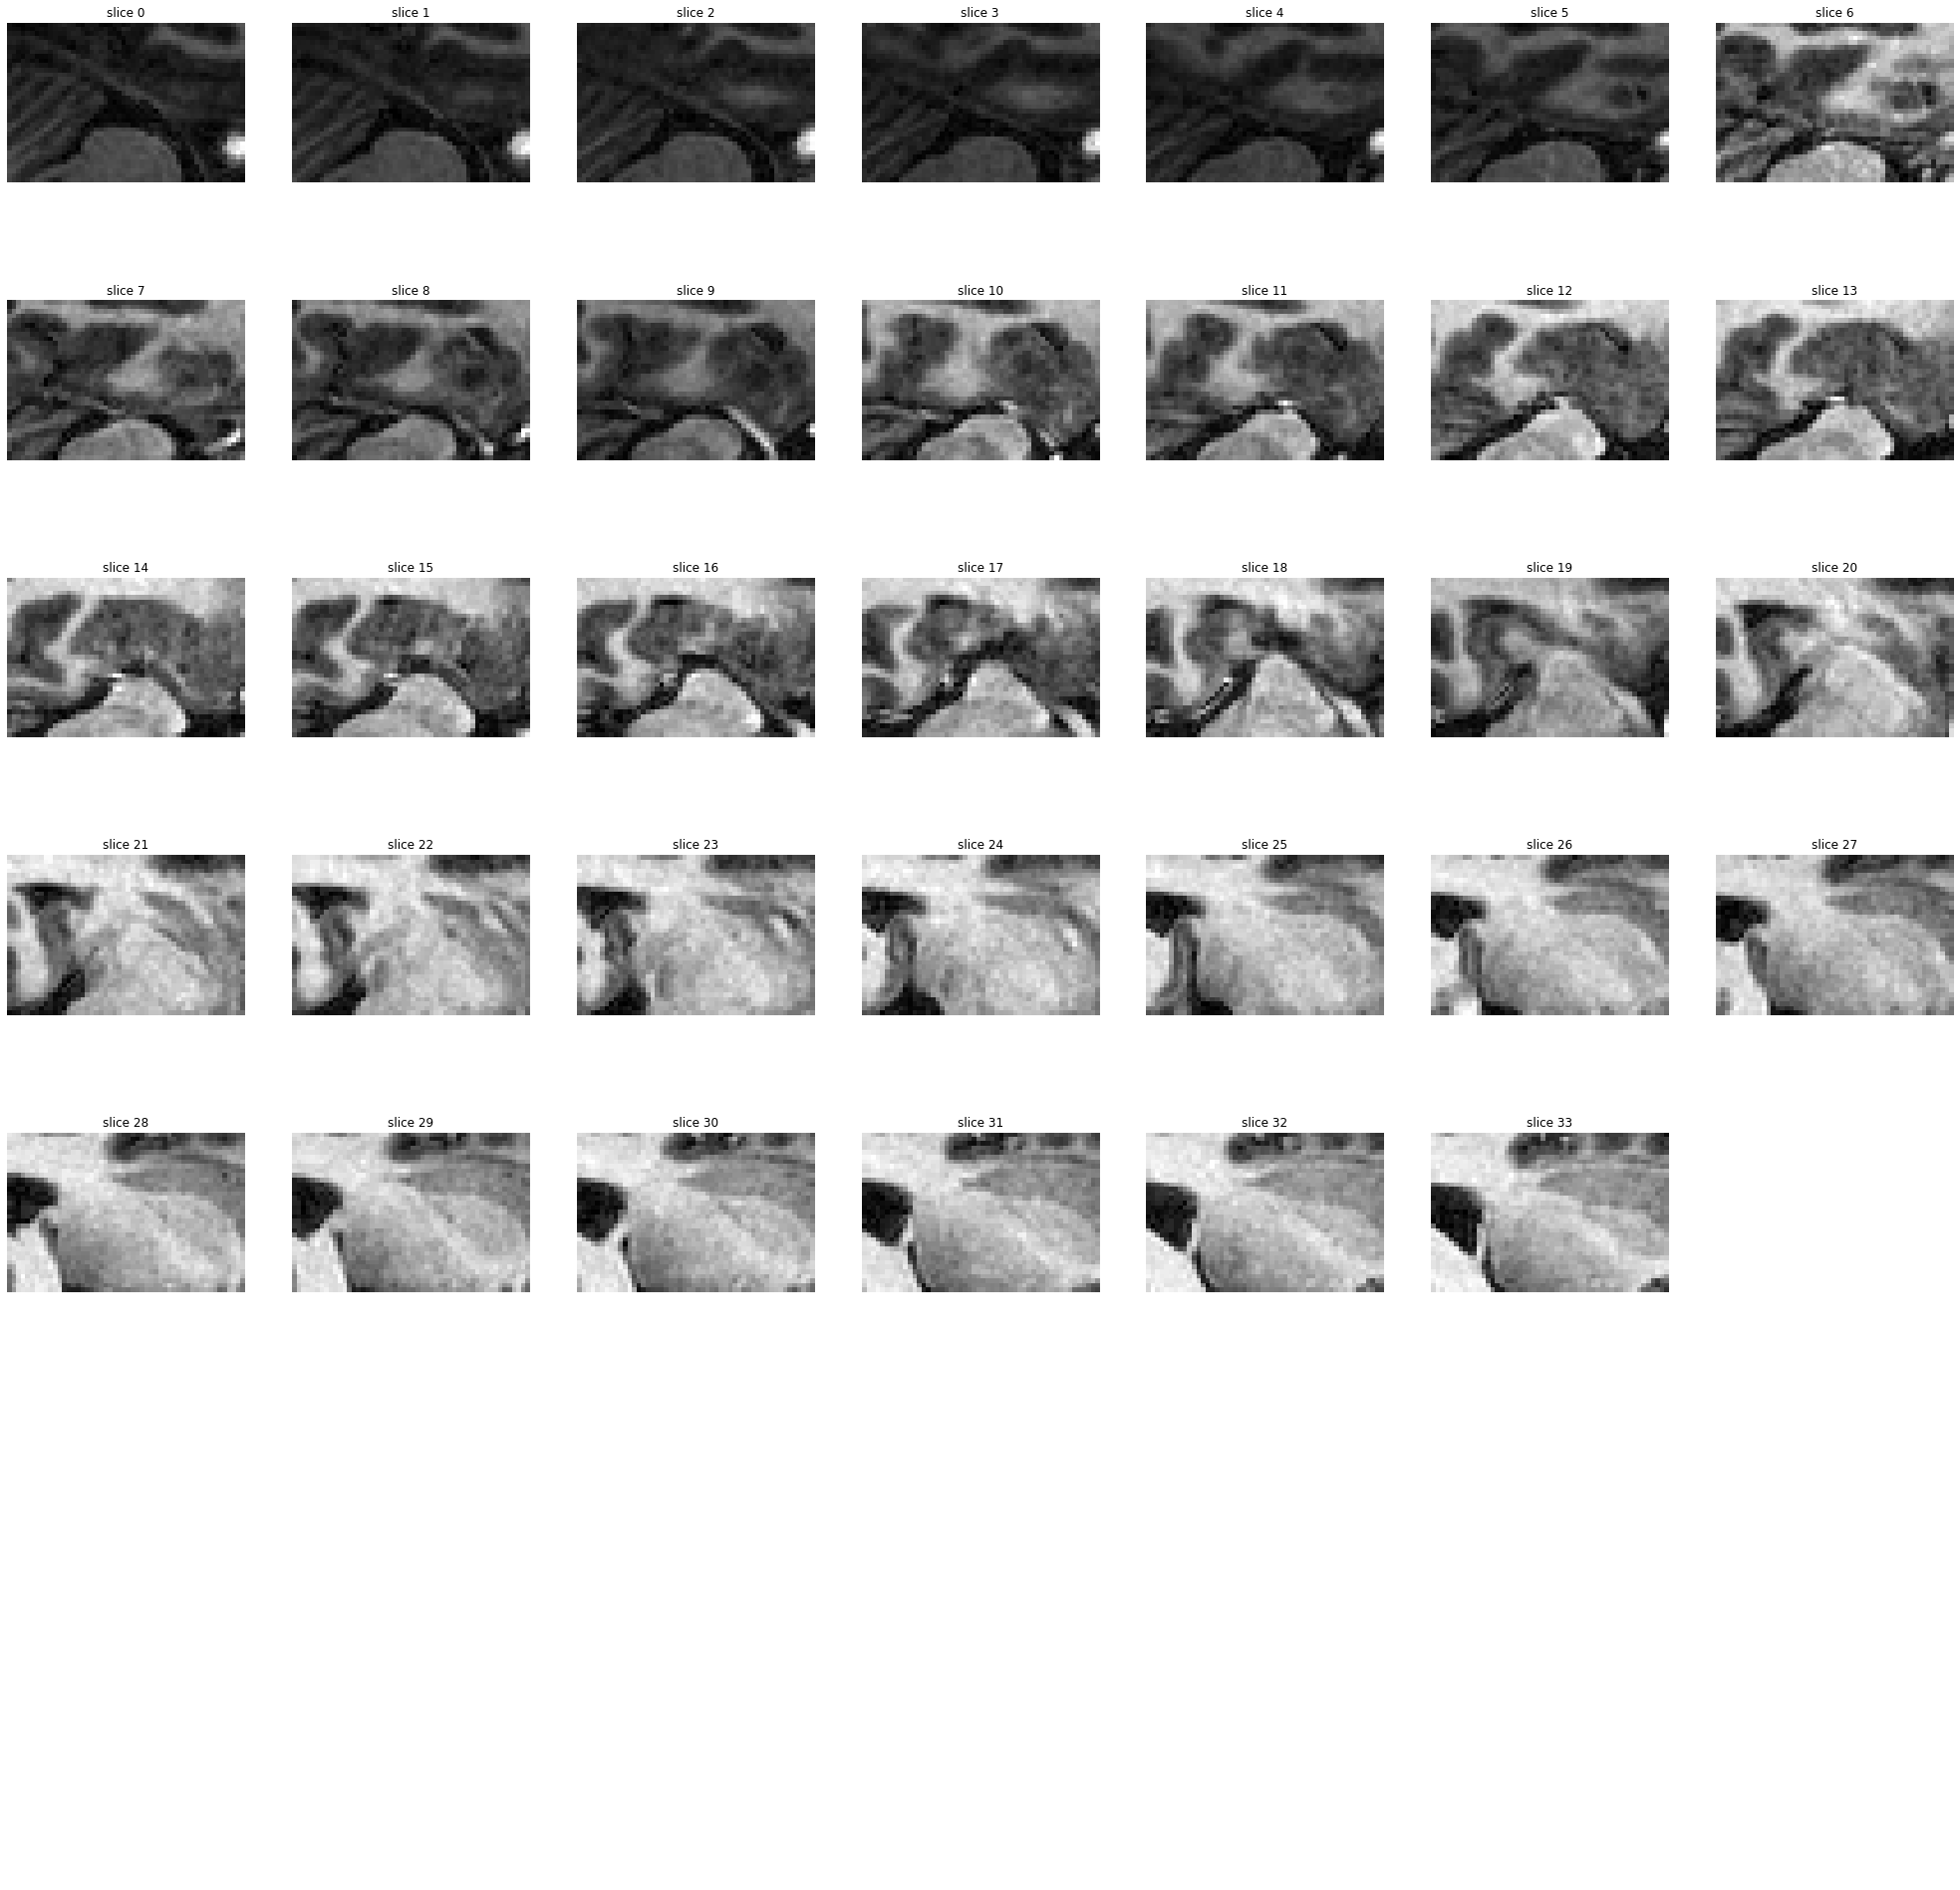

In [11]:

def display_volume_slices(img, w, h):
    plot_w = w
    plot_h = h

    fig, ax = plt.subplots(plot_h, plot_w, figsize=[35,35])

    for i in range(plot_w*plot_h):
        plt_x = i % plot_w
        plt_y = i // plot_w
        if (i < len(img)):
            ax[plt_y, plt_x].set_title(f"slice {i}")
            ax[plt_y, plt_x].imshow(img[i], cmap='gray')
        ax[plt_y, plt_x].axis("off")

    plt.show()

display_volume_slices(np.transpose(image.get_fdata(), (2, 0, 1)), 7, 7)

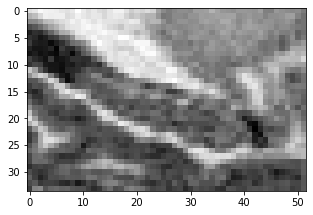

In [12]:
plt.rcParams["figure.figsize"] = (5,5)
plt.imshow(np.rot90(image.get_fdata()[10,:,:]), cmap = "gray");

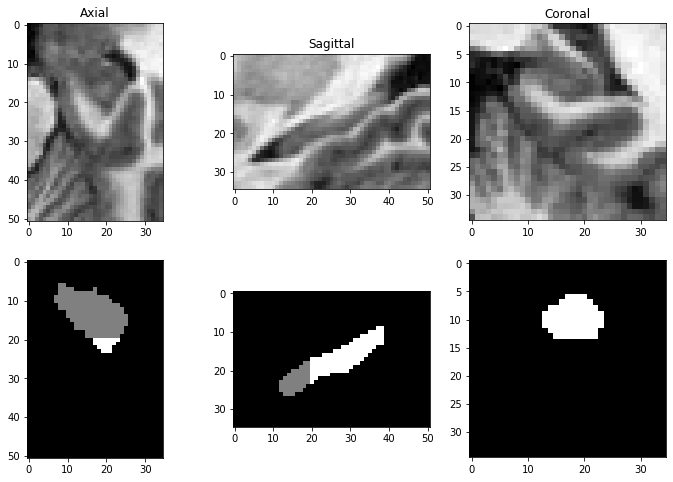

In [27]:
fig = plt.figure(figsize=(12, 8))


fig.add_subplot(2, 3, 1)
plt.imshow(np.flip(np.rot90(image.get_fdata()[:,:,10]), axis=1), cmap="gray")
plt.title('Axial')

fig.add_subplot(2, 3, 2)
plt.imshow(np.flip(np.rot90(image.get_fdata()[10,:,:]), axis=1), cmap="gray")
plt.title('Sagittal')

fig.add_subplot(2, 3, 3)
plt.imshow(np.flip(np.rot90(image.get_fdata()[:,10,:]), axis=1), cmap="gray")
plt.title('Coronal')

fig.add_subplot(2, 3, 4)
plt.imshow(np.flip(np.rot90(label.get_fdata()[:,:,10]), axis=1), cmap="gray")

fig.add_subplot(2, 3, 5)
plt.imshow(np.flip(np.rot90(label.get_fdata()[10,:,:]), axis=1), cmap="gray")

fig.add_subplot(2, 3, 6)
plt.imshow(np.flip(np.rot90(label.get_fdata()[:,10,:]), axis=1), cmap="gray")

plt.show()

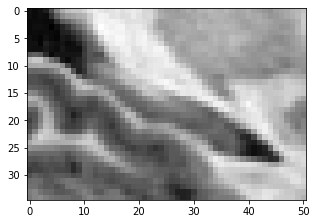

In [28]:
img2d = np.rot90(image.get_fdata()[10,:,:])
plt.imshow(img2d, cmap = "gray", aspect=image.header["pixdim"][3]/image.header["pixdim"][1]);

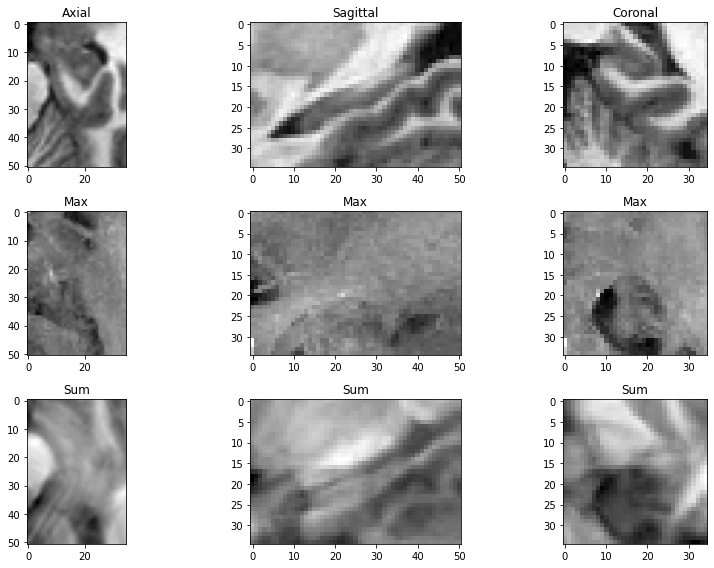

In [29]:

fig = plt.figure(figsize=(12, 8))

fig.add_subplot(3, 3, 1)
plt.imshow(np.flip(np.rot90(image.get_fdata()[:,:,10]), axis=1), cmap="gray")
plt.title('Axial')

fig.add_subplot(3, 3, 2)
plt.imshow(np.flip(np.rot90(image.get_fdata()[10,:,:]), axis=1), cmap="gray")
plt.title('Sagittal')

fig.add_subplot(3, 3, 3)
plt.imshow(np.flip(np.rot90(image.get_fdata()[:,10,:]), axis=1), cmap="gray")
plt.title('Coronal')

# max projection
fig.add_subplot(3, 3, 4)
plt.imshow(np.flip(np.rot90(image.get_fdata().max(axis=2)), axis=1), cmap="gray")
plt.title('Max')

fig.add_subplot(3, 3, 5)
plt.imshow(np.flip(np.rot90(image.get_fdata().max(axis=0)), axis=1), cmap="gray")
plt.title('Max')

fig.add_subplot(3, 3, 6)
plt.imshow(np.flip(np.rot90(image.get_fdata().max(axis=1)), axis=1), cmap="gray")
plt.title('Max')

# sum projection
fig.add_subplot(3, 3, 7)
plt.imshow(np.flip(np.rot90(image.get_fdata().sum(axis=2)), axis=1), cmap="gray")
plt.title('Sum')

fig.add_subplot(3, 3, 8)
plt.imshow(np.flip(np.rot90(image.get_fdata().sum(axis=0)), axis=1), cmap="gray")
plt.title('Sum')

fig.add_subplot(3, 3, 9)
plt.imshow(np.flip(np.rot90(image.get_fdata().sum(axis=1)), axis=1), cmap="gray")
plt.title('Sum')

fig.tight_layout()
plt.show()

# Look at single image 


In [31]:
# https://nipy.org/nibabel/gettingstarted.html
header = image.header
print(header)

<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'
sizeof_hdr      : 348
data_type       : b''
db_name         : b''
extents         : 0
session_error   : 0
regular         : b'r'
dim_info        : 0
dim             : [ 3 35 51 35  1  1  1  1]
intent_p1       : 0.0
intent_p2       : 0.0
intent_p3       : 0.0
intent_code     : none
datatype        : uint8
bitpix          : 8
slice_start     : 0
pixdim          : [1. 1. 1. 1. 1. 0. 0. 0.]
vox_offset      : 0.0
scl_slope       : nan
scl_inter       : nan
slice_end       : 0
slice_code      : unknown
xyzt_units      : 10
cal_max         : 0.0
cal_min         : 0.0
slice_duration  : 0.0
toffset         : 0.0
glmax           : 0
glmin           : 0
descrip         : b'5.0.10'
aux_file        : b'none'
qform_code      : scanner
sform_code      : scanner
quatern_b       : 0.0
quatern_c       : 0.0
quatern_d       : 0.0
qoffset_x       : 1.0
qoffset_y       : 1.0
qoffset_z       : 1.0
srow_x          : [1. 0. 0. 1.]
srow_y          : [0. 

In [35]:
print(f"Format of image : {image.header_class}")

Format of image : <class 'nibabel.nifti1.Nifti1Header'>


In [36]:
print(f"Bits per pixel : {image.header['bitpix']}")

Bits per pixel : 8


In [37]:
print(f"Units of measurement :  {image.header['xyzt_units']}")

Units of measurement :  10


In [38]:
print(f"Grid Spacing: {image.header['pixdim']}")

Grid Spacing: [1. 1. 1. 1. 1. 0. 0. 0.]


In [39]:
print(f"Dimension: {image.header['dim']}")

Dimension: [ 3 35 51 35  1  1  1  1]


In [40]:
image.get_fdata().shape

(35, 51, 35)

In [41]:
nib.aff2axcodes(image.affine)

('R', 'A', 'S')

In [42]:
image.affine

array([[1., 0., 0., 1.],
       [0., 1., 0., 1.],
       [0., 0., 1., 1.],
       [0., 0., 0., 1.]])

In [43]:

np.stack([image.header['srow_x'][:3], image.header['srow_y'][:3], image.header['srow_z'][:3]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]], dtype=float32)

In [44]:
print(f"Hippocampus volume: {np.sum(label.get_fdata() != 0)}")

Hippocampus volume: 2948


In [45]:
extra_slices = []
threshold = 100
for img in img_files:
    img_x, img_y, img_z = nib.load(os.path.join(path_img,img)).get_fdata().shape
    if (img_x > threshold) | (img_y > threshold) | (img_z > threshold):
        extra_slices.append(img)
        print(img)
        print(img_x, img_y, img_z)

hippocampus_010.nii.gz
512 512 241
hippocampus_281.nii.gz
512 512 31


# Remove these images

In [46]:

for img in extra_slices:
    img_files.remove(img)
    img_name = img.split(os.sep)[-1]
    label_files.remove(img_name)

In [47]:

len(img_files), len(label_files)

(260, 260)

Text(0.5, 1.0, 'The size of the whole image')

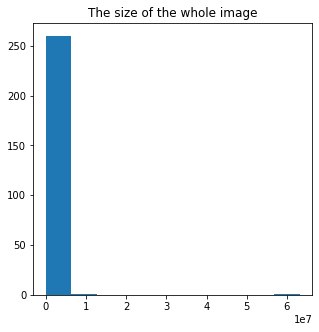

In [33]:
img_total_vol=[]
for file in img_files:
    img=nib.load(os.path.join(path_img,file))
    vol_shape=img.get_fdata().shape
    img_total_vol.append(vol_shape[0]*vol_shape[1]*vol_shape[2])
plt.hist(img_total_vol)
plt.title('The size of the whole image')

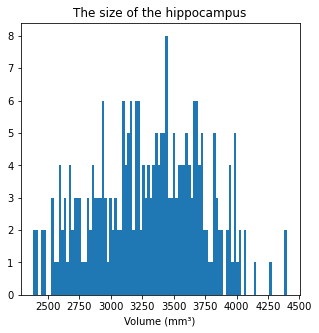

In [48]:
hippo_vol={}
for file in label_files:
    label=nib.load(os.path.join(path_label,file))
    hippo_vol[file] = (np.sum(label.get_fdata() != 0))
plt.hist(hippo_vol.values(), bins = 100);
plt.title('The size of the hippocampus')
plt.xlabel("Volume (mm³)")
plt.show()

In [95]:
[k for k, v in hippo_vol.items() if v < 2500]

['hippocampus_143.nii.gz',
 'hippocampus_144.nii.gz',
 'hippocampus_221.nii.gz',
 'hippocampus_225.nii.gz',
 'hippocampus_279.nii.gz',
 'hippocampus_282.nii.gz',
 'hippocampus_319.nii.gz',
 'hippocampus_320.nii.gz']

In [ ]:
for img in [k for k, v in hippo_vol.items() if v < 2500]:
    print(img)
    img_files.remove(img)
    img_name = img.split(os.sep)[-1]
    label_files.remove(img_name)